In [1]:
import pandas as pd
import geopandas as gpd
import numpy as npb
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.read_csv('../data/interim/populacao/interim_populacao.csv').columns

Index(['MUNIC_RES', '2007.0', '2008.0', '2009.0', '2010.0', '2011.0', '2012.0',
       '2013.0', '2014.0', '2015.0', '2016.0', '2017.0', '2018.0', '2019.0',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', 'ANO', 'POPULACAO'],
      dtype='object')

In [5]:
def load_data(incidence_para, shapes_para, municipalities_para):
    '''
    | incidence_para: arquivo .csv com taxa de incidência ou outra medida anual para cada município identificado 
    | por código de 6 dígitos.
    |
    | shapes: arquivo de polígonos do IBGE para cada município
    | 
    | returns: dataframe `incidence` acrescido da média do último triênio (trienio) e a média de todos anos para cada
    | município; polígono de cada município (geometry).
    '''
    
    incidence = pd.read_csv(incidence_para, index_col='ibge_code') 
   
    # *.shp vai utilizar o arquiv .shx e .dbf 
    shapes = gpd.read_file(shapes_para, encoding='utf-8')
    shapes = shapes.set_index('ibge_code')
    
    mun = pd.read_csv(municipalities_para, index_col='ibge_code')
    
    years = incidence.columns
    incidence['triennium'] = incidence.loc[:, years[-3:]].mean(axis=1)    
    incidence['mean'] = incidence.loc[:, years].mean(axis=1)
    incidence['geometry'] = incidence.index.map(shapes['geometry'].to_dict())
    incidence['mesorregiao'] = incidence.index.map(mun['mesorregiao'].to_dict())
    return incidence

df = load_data(
    '../data/processed/rates_per_year_groupby_municipalities.csv',
    '../data/interim/poligonos/shapes_para.shp',
    '../data/interim/municipios/brasil_municipios_reduced.csv'
)

In [9]:
df.head(3)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,triennium,mean,geometry,mesorregiao
ibge_code,,,,,,,,,,,,,,,,,
150010,12.100861,16.666063,3.576052,9.925277,4.902476,2.769795,4.753271,2.686854,0.664757,5.923625,4.563828,3.199140,3.170617,3.644529,5.761740,"POLYGON ((-48.831385391 -1.563520437, -48.8291...",Nordeste Paraense
150013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((-48.563098596 -4.826597649, -48.5599...",Sudeste Paraense
150020,56.340379,14.321372,12.370879,18.654976,33.532042,31.606150,14.806589,12.951690,11.097958,16.642012,20.334221,25.219318,8.994262,18.182600,21.297834,"POLYGON ((-48.309739159 -1.470276388, -48.3069...",Nordeste Paraense


In [12]:
from libpysal.weights.contiguity import Queen
from splot.esda import moran_scatterplot
from splot.esda import plot_moran
from esda.moran import Moran

In [30]:
y = df.loc[:, '2007'].values  
w = Queen.from_dataframe(df)
w.transform = 'r'

In [50]:
from libpysal.weights import W
y = pd.Series([2,3,7,2,4,6])
n = {0:[1,5], 1:[0,2,3,5], 2:[1,3], 3:[1,2,4,5], 4:[3,5], 5:[0,1,3,4]}
w =  W(n)
w.transform = 'b'
print(w.s0, w.s1, w.s2)

moran = Moran(y, w)
moran.I


18.0 36.0 240.0


-0.4659090909090909

In [29]:
y = df.loc[:, '2007'].values    
moran = Moran(y, w)
moran.I

0.38599534544451947

In [25]:
print(w.s0, w.s1, w.s2)
w.neighbors,
w.weights,
w.transform

144.0 58.61155675233056 598.5849436255984


'R'

In [50]:
m=pd.read_csv('../data/interim/municipios/brasil_municipios_reduced.csv', index_col='ibge_code')

In [19]:
shapes = gpd.read_file('../data/interim/poligonos/shapes_para.shp', encoding='utf-8')
shapes = shapes.set_index('ibge_code')

In [25]:
col = gpd.read_file('../experiments/satscan/RESULTS_POISSON_SPACE_TIME/results.col.shp', encoding='utf-8')

In [36]:
gis = gpd.read_file(
    '../experiments/satscan/RESULTS_POISSON_SPACE_TIME/results.gis.shp', 
    encoding='utf-8',
    crs="EPSG:4326"
)

In [37]:
gis.loc[:, ['CLUSTER', 'LOC_ID']] = gis.loc[:, ['CLUSTER', 'LOC_ID']].astype('int')

In [48]:
col.head()

,CLUSTER,LOC_ID,LATITUDE,LONGITUDE,RADIUS,START_DATE,END_DATE,NUMBER_LOC,LLR,P_VALUE,OBSERVED,EXPECTED,ODE,REL_RISK,POPULATION,GINI_CLUST,geometry
0,1.0,150840,None,None,None,2014/1/1,2019/12/31,17.0,None,None,1256.0,None,None,None,None,F,"POLYGON ((-49.70358 -5.33439, -49.67539 -5.334..."
1,2.0,150795,None,None,None,2007/1/1,2013/12/31,22.0,None,None,1356.0,None,None,None,None,F,"POLYGON ((-48.95128 -1.35549, -48.92367 -1.355..."
2,3.0,150630,None,None,None,2007/1/1,2013/12/31,1.0,None,None,36.0,None,None,None,None,F,"POLYGON ((-48.51601 -0.59182, -48.51367 -0.591..."


In [47]:
gis.head()

,LOC_ID,CLUSTER,P_VALUE,CLU_OBS,CLU_EXP,CLU_ODE,CLU_RR,CLU_POP,LOC_OBS,LOC_EXP,LOC_ODE,LOC_RR,LOC_POP,LOC_LAT,LOC_LONG,GINI_CLUST,geometry
0,150840,1,None,1256.0,None,None,None,None,36.0,None,None,None,None,None,None,F,POINT (-49.63527 -6.91778)
1,150775,1,None,1256.0,None,None,None,None,0.0,None,None,None,None,None,None,F,POINT (-49.56977 -6.83889)
2,150616,1,None,1256.0,None,None,None,None,15.0,None,None,None,None,None,None,F,POINT (-49.89514 -7.34063)
3,150304,1,None,1256.0,None,None,None,None,20.0,None,None,None,None,None,None,F,POINT (-49.57603 -7.54832)
4,150215,1,None,1256.0,None,None,None,None,74.0,None,None,None,None,None,None,F,POINT (-50.08567 -6.42421)


In [38]:
cluster1 = gis.groupby('CLUSTER').get_group(1)
cluster2 = gis.groupby('CLUSTER').get_group(2)
cluster3 = gis.groupby('CLUSTER').get_group(3)

In [46]:
cluster1

,LOC_ID,CLUSTER,P_VALUE,CLU_OBS,CLU_EXP,CLU_ODE,CLU_RR,CLU_POP,LOC_OBS,LOC_EXP,LOC_ODE,LOC_RR,LOC_POP,LOC_LAT,LOC_LONG,GINI_CLUST,geometry
0,150840,1,None,1256.0,None,None,None,None,36.0,None,None,None,None,None,None,F,POINT (-49.63527 -6.91778)
1,150775,1,None,1256.0,None,None,None,None,0.0,None,None,None,None,None,None,F,POINT (-49.56977 -6.83889)
2,150616,1,None,1256.0,None,None,None,None,15.0,None,None,None,None,None,None,F,POINT (-49.89514 -7.34063)
3,150304,1,None,1256.0,None,None,None,None,20.0,None,None,None,None,None,None,F,POINT (-49.57603 -7.54832)
4,150215,1,None,1256.0,None,None,None,None,74.0,None,None,None,None,None,None,F,POINT (-50.08567 -6.42421)
5,150277,1,None,1256.0,None,None,None,None,26.0,None,None,None,None,None,None,F,POINT (-49.62461 -6.22893)
6,150034,1,None,1256.0,None,None,None,None,1.0,None,None,None,None,None,None,F,POINT (-50.43016 -6.77298)
7,150563,1,None,1256.0,None,None,None,None,7.0,None,None,None,None,None,None,F,POINT (-49.01177 -6.54103)
8,150555,1,None,1256.0,None,None,None,None,15.0,None,None,None,None,None,None,F,POINT (-50.12362 -7.73698)
9,150295,1,None,1256.0,None,None,None,None,150.0,None,None,None,None,None,None,F,POINT (-49.24544 -6.06965)


<AxesSubplot:>

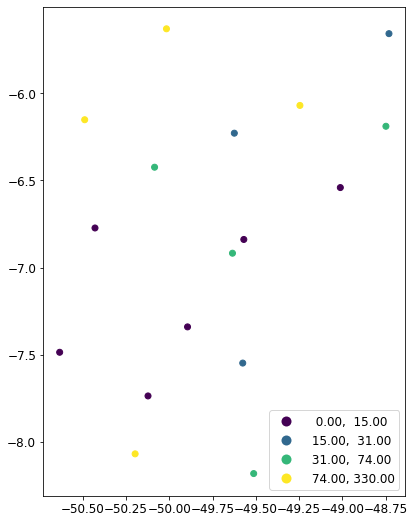

In [42]:
ax = geoplot.kdeplot(
    collisions.head(1000), clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea()
)
geoplot.polyplot(boroughs, ax=ax, zorder=1)